# Power Spectra

In [1]:
#for using custom PyPPM for development:
import sys
sys.path.insert(0, '/home/user/PyPPM/')

%pylab nbagg
from ppmpy import ppm
import matplotlib.pyplot as pl
from nugridpy.utils import colourblind as cb

Populating the interactive namespace from numpy and matplotlib


In [2]:
ppm.set_YProf_path('/data/ppm_rpod2/YProfiles/AGBTP_M2.0Z1.e-5/')
F4 = ppm.yprofile('F4')

In [3]:
spec_dir = '/data/ppm_rpod2/spectra/data/'
!ls /data/ppm_rpod2/spectra/data/

LZagb-0010-Ur-17.ylmspc  LZagb-0340-Ur-17.ylmspc  LZagb-1040-Ur-20.ylmspc
LZagb-0020-Ur-17.ylmspc  LZagb-0400-Ur-17.ylmspc  LZagb-1100-Ur-17.ylmspc
LZagb-0040-Ur-17.ylmspc  LZagb-0460-Ur-17.ylmspc  LZagb-1200-Ur-17.ylmspc
LZagb-0060-Ur-17.ylmspc  LZagb-0520-Ur-17.ylmspc  LZagb-1300-Ur-17.ylmspc
LZagb-0080-Ur-17.ylmspc  LZagb-0580-Ur-17.ylmspc  LZagb-1400-Ur-17.ylmspc
LZagb-0100-Ur-17.ylmspc  LZagb-0600-Ur-26.ylmspc  LZagb-1500-Ur-17.ylmspc
LZagb-0120-Ur-17.ylmspc  LZagb-0640-Ur-17.ylmspc  LZagb-1600-Ur-17.ylmspc
LZagb-0140-Ur-17.ylmspc  LZagb-0700-Ur-17.ylmspc  LZagb-1700-Ur-17.ylmspc
LZagb-0160-Ur-17.ylmspc  LZagb-0800-Ur-17.ylmspc  LZagb-1800-Ur-17.ylmspc
LZagb-0200-Ur-17.ylmspc  LZagb-0900-Ur-17.ylmspc  LZagb-1900-Ur-17.ylmspc
LZagb-0240-Ur-17.ylmspc  LZagb-1000-Ur-17.ylmspc
LZagb-0280-Ur-17.ylmspc  LZagb-1040-Ur-16.ylmspc


In [4]:
dumps = [160, 340, 520, 700, 900]
markers = ['v', '^', '<', '>', 'o', 's']
colours = [9, 3, 5, 8, 1, 6]

<IPython.core.display.Javascript object>


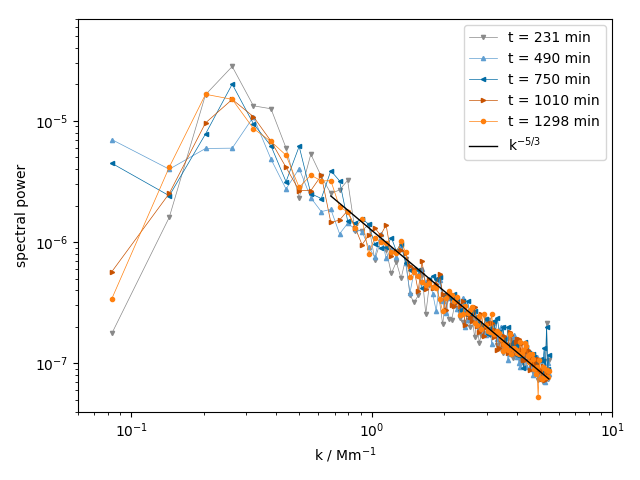

In [5]:
ifig = 1; pl.close(ifig); pl.figure(ifig)
for i in range(len(dumps)):
    t = F4.get('t', fname = dumps[i] - 1, resolution = 'l', silent = False)[-1]
    
    rad = 17.
    fname = spec_dir + 'LZagb-{:04d}-Ur-{:02.0f}.ylmspc'.format(dumps[i], rad)
    data = np.loadtxt(fname)
    
    L = data[:, 0]
    k = np.sqrt(L*(L + 1.))/rad
    power_dat = data[:, 1]
    
    pl.loglog(k, power_dat, '-', lw=0.5, color=cb(colours[i]), marker=markers[i], \
               markevery=1, markersize=3., label='t = {:.0f} min'.format(t/60.))
    
pl.loglog(k[10:], 1.25e-6*k[10:]**(-5./3.), 'k-', lw=1., label=r'k$^{-5/3}$')
    
pl.legend(loc=1, ncol=1)
pl.xlim((6e-2, 1e1))
pl.ylim((4e-8, 7e-5))
pl.xlabel(r'k / Mm$^{-1}$')
pl.ylabel('spectral power')
pl.tight_layout()